In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Datasets/Google-Playstore.csv')

Feature 2

In [6]:
my_input = 'Gakondo'

searched_app = df[df['App Name'] == my_input]
searched_app_list = [searched_app['App Name'].values[0], searched_app['Size'].values[0], searched_app['Rating'].values[0], searched_app['Category'].values[0], searched_app['Released'].values[0]]

In [7]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [8]:
df[df['App Name'] == 'Gakondo'][['Minimum Android']]

,Minimum Android
0,7.1 and up


___

Feature 1

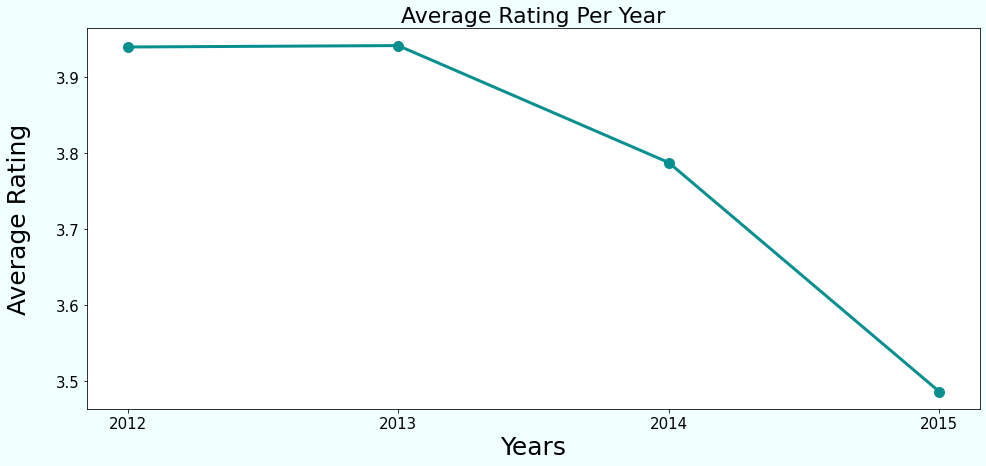

In [9]:
my_input_category = 'Music & Audio'
starting_year = '2012'
ending_year = '2015'

category_data = df[df['Category'] == my_input_category]

def split_in(x):
    a = str(x).split(' ')
    return a[-1]

df_without_released_null = category_data[category_data['Released'].notna()]

df_without_released_null ['Year'] = df_without_released_null['Released'].apply(split_in)

df_mean_rating = df_without_released_null.pivot_table(index=['Year'], aggfunc=np.mean)
df_mean_rating = df_mean_rating[(df_mean_rating.index >= starting_year) & (df_mean_rating.index <= ending_year)]

x = df_mean_rating.index
y = df_mean_rating.Rating

plt.figure(figsize=(16,7), facecolor='#F0FFFF')
plt.xlabel('Years', fontsize=25)
plt.ylabel('Average Rating', fontsize=25 , labelpad=25)
plt.title('Average Rating Per Year', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x, y, marker = 'o', linewidth=3, markersize=10, color='#088F8F')
plt.savefig('test.png', bbox_inches = 'tight')

___

Feature 2 and 3 combined

In [10]:
my_input = 'Gakondo'

def my_func(x):
    a = str(x).split(' ')
    a = a[0]
    aa = a[0:3]
    return aa

searched_app = df
searched_app['Android Column'] = df['Minimum Android'].apply(my_func)


data_android_version_2 = searched_app[~(searched_app['Android Column'].str.contains('nan'))]

# my_version = 8.1
# # my_input = 'Outlook'

searched_android_version = data_android_version_2[data_android_version_2['App Name'] == my_input]



searched_app_list = [searched_android_version['App Name'].values[0], searched_android_version['Size'].values[0], searched_android_version['Rating'].values[0], 
                    searched_android_version['Category'].values[0], searched_android_version['Released'].values[0], 
                    searched_android_version['Android Column'].values[0]]


In [11]:
searched_app_list

['Gakondo', '10M', 0.0, 'Adventure', 'Feb 26, 2020', '7.1']

____

Feature 3

In [12]:
def my_func(x):
    a = str(x).split(' ')
    a = a[0]
    aa = a[0:3]
    return aa

data_android_version = df
data_android_version['Android Column'] = df['Minimum Android'].apply(my_func)
data_android_version[['App Name','Android Column']]

data_android_version_2 = data_android_version[(data_android_version['Android Column'].str.contains('[0-9]'))]

In [13]:
searched_android_version[searched_android_version['App Name'] == 'Gakondo']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Android Column
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,7.1


In [14]:
my_version = 8.1
my_input = 'Outlook'

searched_android_version = data_android_version_2[data_android_version_2['App Name'] == my_input]

if list(searched_android_version['Android Column']) != []:
    if float(searched_android_version['Android Column']) < my_version:
        final_return = 'Compatible with your device'
    else:
        final_return = 'Not compatible with your device'
else:
    final_return = 'Varies with devices'
    
final_return

'Compatible with your device'

_____________

## 1) How many apps are paid and how many are free?

In [15]:
df_true = df[df['Free'] == True]['Free']
df_false = df[df['Free'] == False]['Free']

free_apps = df_true.count()
paid_apps = df_false.count()

percentage_of_free_apps = (free_apps)/(free_apps+paid_apps)*100
percentage_of_paid_apps = (paid_apps)/(free_apps+paid_apps)*100

print(percentage_of_free_apps, percentage_of_paid_apps)

98.05148762788896 1.9485123721110411


________________

## 2) How many apps are Ad-supported and how many aren't?

In [16]:
df_true_ad_supported = df[df['Ad Supported'] == True]['Ad Supported']
df_false_ad_supported = df[df['Ad Supported'] == False]['Ad Supported']

ad_supported_apps = df_true_ad_supported.count()
non_ad_supported_apps = df_false_ad_supported.count()

percentage_of_ad_supported_apps = ad_supported_apps/(ad_supported_apps+non_ad_supported_apps)*100
percentage_of_non_ad_supported_apps = non_ad_supported_apps/(ad_supported_apps+non_ad_supported_apps)*100

print(percentage_of_ad_supported_apps, percentage_of_non_ad_supported_apps)

49.75364729971846 50.24635270028155


____________

## 3) How many apps are released per year?

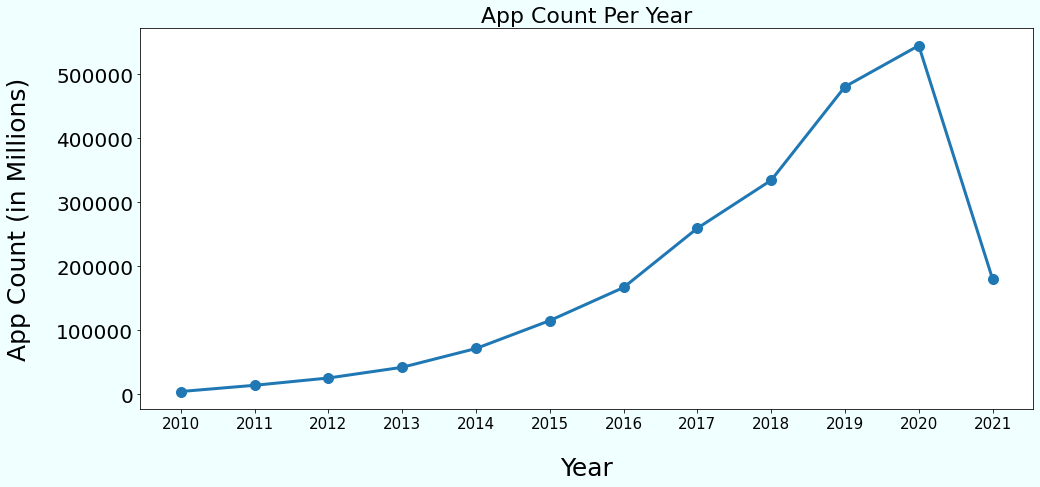

In [17]:
df_clean_released_column = df[df['Released'].notna()][['Released']]

def split_in(x):
    a = str(x).split(' ')
    return a[-1]

df_clean_released_column['Year'] = df['Released'].apply(split_in)

year_wise_add = df_clean_released_column.groupby('Year').count()

x = year_wise_add.index
y = year_wise_add['Released']
plt.figure(figsize=(16,7), facecolor='#F0FFFF')
plt.xlabel('Year',  fontsize=25, labelpad=25)
plt.ylabel('App Count (in Millions)', fontsize=25,  labelpad=25)
plt.title('App Count Per Year', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.plot(x, y, marker='o', linewidth=3, markersize=10)
# plt.show()
plt.savefig('Test.png', bbox_inches = 'tight', color='#088F8F')

In [18]:
import plotly.express as xp

In [19]:
fig = xp.line(year_wise_add,x=x,y = y)
fig.write_html("file.html")

____________

## 4) Which app has been downloaded the most?

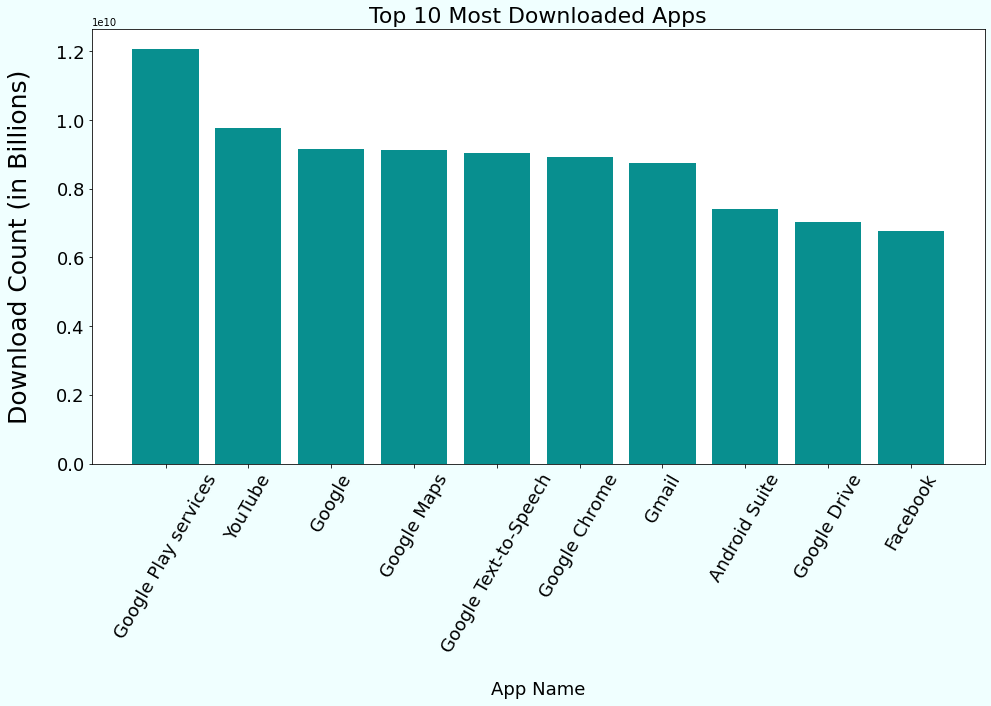

In [20]:
df_most_download_apps = df.sort_values('Maximum Installs', ascending=False)[['App Name', 'Maximum Installs']].head(10)

plt.figure(figsize=(16,8), facecolor='#F0FFFF')
plt.yticks(fontsize=18)
plt.xticks(rotation=60, fontsize=18)
plt.xlabel('App Name', fontsize=18, labelpad=25)
plt.ylabel('Download Count (in Billions)', fontsize=25, labelpad=25)
plt.title('Top 10 Most Downloaded Apps', fontsize=22)
# x = df_most_download_apps['App Name']
x = ['Google Play services','YouTube', 'Google', 'Google Maps' ,'Google Text-to-Speech' ,'Google Chrome' ,'Gmail' 
         ,'Android Suite', 'Google Drive' ,'Facebook']
y = df_most_download_apps['Maximum Installs']


# plt.figure(figsize=(18,8))
# plt.xlabel('Year',  fontsize=25, labelpad=25)
# plt.ylabel('User Count (in Millions)', fontsize=25, labelpad=25)
# plt.title('User Count Per Year', fontsize=25)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=20)
# plt.plot(year_wise_add_2.index,year_wise_add_2['Rating Count'], marker = 'o', linewidth=3, markersize=10 )

plt.bar(x,y, color='#088F8F')
# plt.show()
plt.savefig('test4.png', bbox_inches = 'tight')

_____________

## 5) How many users have responded (given rating) to the apps in a particular year?

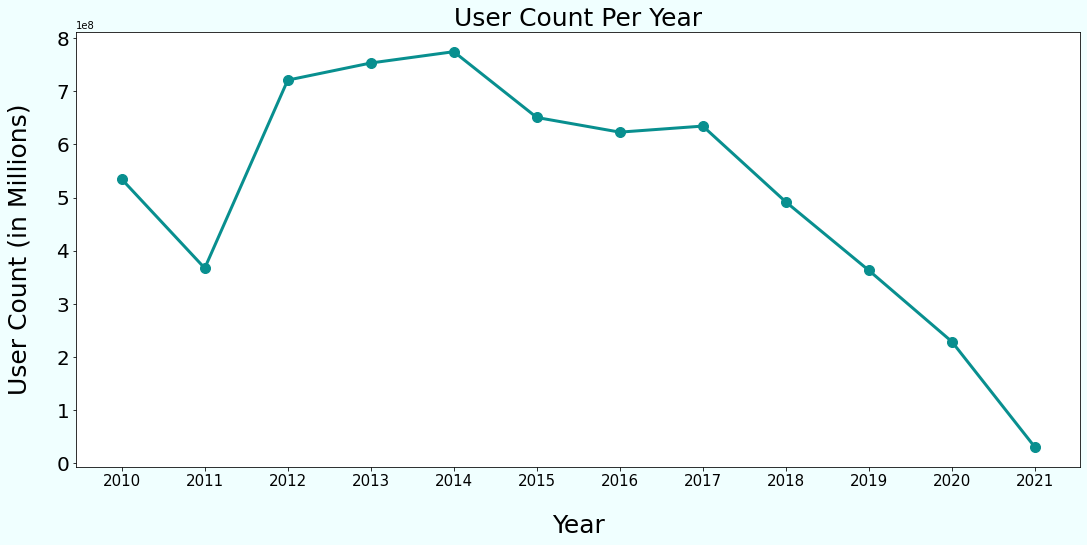

In [21]:
df_clean_released_column_2 = df[(df['Rating Count'].notna()) & (df['Released'].notna())][['Rating Count', 'Released']]

df_clean_released_column_2['Year'] = df['Released'].apply(split_in)

year_wise_add_2 = df_clean_released_column_2.pivot_table(index=['Year'],aggfunc=np.sum)

plt.figure(figsize=(18,8), facecolor='#F0FFFF')
plt.xlabel('Year',  fontsize=25, labelpad=25)
plt.ylabel('User Count (in Millions)', fontsize=25, labelpad=25)
plt.title('User Count Per Year', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)



plt.plot(year_wise_add_2.index,year_wise_add_2['Rating Count'], marker = 'o', linewidth=3, markersize=10, color='#088F8F' )
plt.savefig('test3.png', bbox_inches = 'tight')

____

## 6) Quality level of applications based on good, average, or poor as rated by the users.

In [22]:
clean_rating_column = df[df['Rating'].notna()]

def convert_me(x):
    if x >= 4.5:
        return 'Good'
    elif x >= 3.0:
        return 'Average'
    else:
        return 'Poor'
    
df['Rating text'] = df['Rating'].apply(convert_me)
app_rating_count = df['Rating text'].value_counts()


x = app_rating_count.index
y = app_rating_count.values

# plt.figure(figsize=(16,8))
# plt.xlabel('Quality Level', fontsize=18)
# plt.ylabel('App Count (in Millions)', fontsize=18)
# plt.title('Apps Quality Level w.r.t ratings', fontsize=22)

# plt.bar(x,y)
# plt.show()

quality_rating = []

for i in y:
    total = round(i/sum(y)*100, 2)
    quality_rating.append(total)
    
print(x, quality_rating)

Index(['Poor', 'Average', 'Good'], dtype='object') [50.54, 31.17, 18.29]


__________

## 7) Which category is more popular among the users?

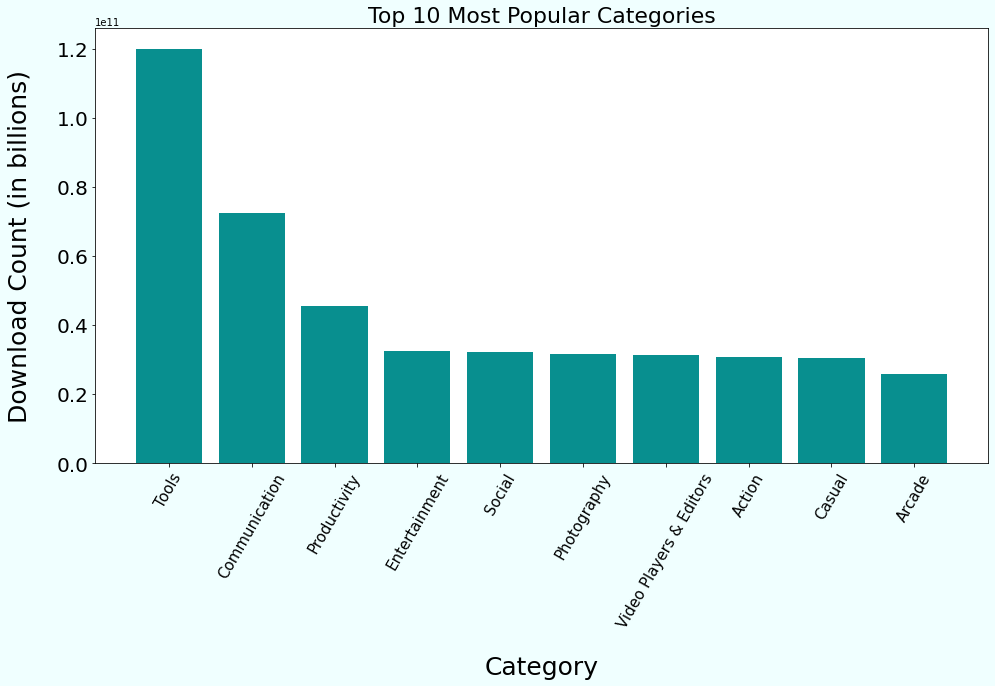

In [23]:
df_category_wise = df.pivot_table(index=['Category'], aggfunc=np.sum)
df_category_wise_2 = df_category_wise['Maximum Installs'].sort_values(ascending=False)[0:10]

x = df_category_wise_2.index
y= df_category_wise_2.values

plt.figure(figsize=(16,8), facecolor='#F0FFFF')
plt.xlabel('Category',  fontsize=25, labelpad=25)
plt.ylabel('Download Count (in billions)', fontsize=25, labelpad=25)
plt.title('Top 10 Most Popular Categories', fontsize=22)
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=20)




# plt.plot(year_wise_add_2.index,year_wise_add_2['Rating Count'], marker = 'o', linewidth=3, markersize=10, color='#088F8F' )


plt.bar(x,y, color='#088F8F')
plt.savefig('gggf.png', bbox_inches = 'tight')

_______________

## 8) Top & Bottom-most app categories with respect to Average Rating.

Top 5

In [24]:
average_rating_category_based = df.groupby('Category').mean()['Rating'].sort_values(ascending=False)

x = average_rating_category_based[:5].index
y = average_rating_category_based[:5].values

# plt.figure(figsize=(16,5))
# plt.xlabel('Average Rating', fontsize=18)
# plt.ylabel('Category', fontsize=18)
# plt.title('Average Rating per category', fontsize=22)

# plt.barh(x,y)
# plt.show()
top5_rating_based_apps = []

for i in range(0, len(x)):
    rating = round(y[i], 1)
    top5_rating_based_apps.append((x[i], rating))

In [25]:
top5_rating_based_apps

[('Role Playing', 3.4),
 ('Casino', 3.3),
 ('Simulation', 3.2),
 ('Weather', 3.1),
 ('Card', 3.1)]

Bottom 5

In [26]:
x = average_rating_category_based[-5:].index
y = average_rating_category_based[-5:]

# plt.figure(figsize=(16,5))
# plt.xlabel('Average Rating',  fontsize=18)
# plt.ylabel('Category', fontsize=18)
# plt.title('Average Rating per category', fontsize=22)

# plt.barh(x,y)
# plt.show()

bottom5_rating_based_apps = []

for i in range(0, len(x)):
    rating = round(y[i], 1)
    bottom5_rating_based_apps.append((x[i], rating))

In [27]:
bottom5_rating_based_apps

[('House & Home', 1.5),
 ('Business', 1.4),
 ('Beauty', 1.4),
 ('Food & Drink', 1.3),
 ('Events', 1.3)]

__________________

## 9) Top 10 fast growing apps since January, 2020.

In [30]:
from numerize import numerize

In [31]:
df_recent_famous_app = df[(df['Released'].notna())]
df_recent_famous_app_2 = df_recent_famous_app[(df['Released'].str.contains('2020'))  | 
                                              (df['Released'].str.contains('2021'))][['App Name', 'Maximum Installs', 'Released']]

df_maximum_Installs_sorted = df_recent_famous_app_2.sort_values('Maximum Installs', ascending=False)[0:10]

x = df_maximum_Installs_sorted['App Name']
y = df_maximum_Installs_sorted['Maximum Installs']

# plt.figure(figsize=(16,8))
# plt.xlabel('App Name', fontsize=18)
# plt.ylabel('Download Count (in Millions)', fontsize=18)
# plt.title('Most Downloaded Apps (in recent years)', fontsize=22)
# plt.xticks(rotation=60)

# plt.bar(x,y)
# plt.show()

top_most_downloads_recent = []

for i in range(0, len(x)):
    top_most_downloads_recent.append((x.values[i], numerize.numerize(float(y.values[i]))))

In [32]:
top_most_downloads_recent

[('Samsung Members', '776.61M'),
 ('[Samsung] Always On Display', '738.94M'),
 ('Weather - By Xiaomi', '711.62M'),
 ('HUAWEI Video', '450.79M'),
 ('Google Pay: A safe & helpful way to manage money', '426.4M'),
 ('Microsoft Office: Word, Excel, PowerPoint & More', '374.94M'),
 ('Mi Browser Pro - Video Download, Free, Fast&Secure', '250.56M'),
 ('Moto Widget', '250.35M'),
 ('My Talking Tom Friends', '246.88M'),
 ('Mi Calendar', '229.42M')]

___

## 10) Most expensive and cheapest app.

In [28]:
df_paid_apps = df[(df['Free'] == False) & df['Price'] != 0.00].sort_values('Price')
most_cheapest_apps = df_paid_apps.iloc[0:2][['App Name', 'Price']].values
most_expensive_app = df_paid_apps.iloc[-1][['App Name', 'Price']].values

In [29]:
df_paid_apps.iloc[-1][['App Name', 'Price']].values

array(['MESH Connect', 400.0], dtype=object)

____

## 12) Rating History of Play Store.

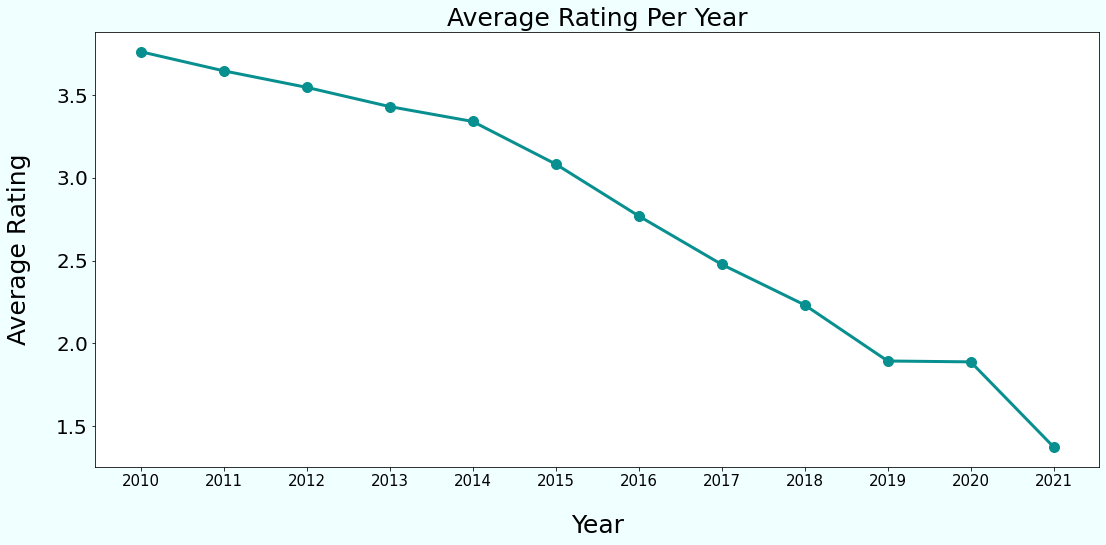

In [184]:
df_without_released_null = df[df['Released'].notna()]

df_without_released_null ['Year'] = df_without_released_null['Released'].apply(split_in)

df_mean_rating = df_without_released_null.pivot_table(index=['Year'], aggfunc=np.mean)

x = df_mean_rating.index
y = df_mean_rating.Rating

plt.figure(figsize=(18,8), facecolor='#F0FFFF')
plt.xlabel('Year',  fontsize=25, labelpad=25)
plt.ylabel('Average Rating', fontsize=25, labelpad=25)
plt.title('Average Rating Per Year', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.plot(x,y, marker = 'o', linewidth=3, markersize=10, color='#088F8F' )
plt.savefig('test3111.png', bbox_inches = 'tight')

_____

## 13) Which apps are secured (https) and which aren't (http)?

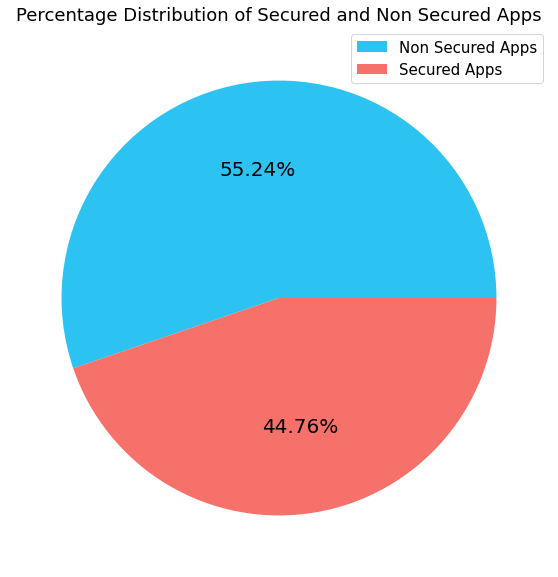

In [192]:
df_secured_website_or_not = df[df['Developer Website'].notna()]

def split_in(x):
    a = str(x).split(':')
    return a[0]

df_secured_website_or_not['Link'] = df_secured_website_or_not['Developer Website'].apply(split_in)

df_secured_website_https = df_secured_website_or_not[df_secured_website_or_not['Link'] == 'https']['Developer Website'].count()
df_secured_website_http = df_secured_website_or_not[df_secured_website_or_not['Link'] == 'http']['Developer Website'].count()

ratio_of_https_apps = df_secured_website_https/(df_secured_website_https+df_secured_website_http)*100
ratio_of_http_apps = df_secured_website_http/(df_secured_website_https+df_secured_website_http)*100

plt.figure(figsize=(16,10))
x = np.array([ratio_of_http_apps, ratio_of_https_apps])
plt.title('Percentage Distribution of Secured and Non Secured Apps', fontsize=18)

plt.pie(x, autopct='%1.2f%%', textprops={'fontsize': 20}, colors =['#2cc3f2','#f6716a'])
plt.legend(labels = ['Non Secured Apps','Secured Apps'], fontsize=15, loc='best')
plt.show()